In [6]:
import pandas as pd
import numpy as np
import plotly as px
import matplotlib.pyplot as plt
from colorama import Fore, Back, Style
import json
import os
import matplotlib.colors as mcolors

# Etape I --> Importer / Nettoyer

### Importation

In [50]:
wd = os.getcwd()

In [51]:
file_path = '../data/original/ESP_PUBLIC.IDENTITE_ARBRE.csv'
df = pd.read_csv(file_path, sep=',', header = 0, index_col=False)
dff = df

In [52]:
df

,ELEM_POINT_ID,CODE,NOM,GENRE,GENRE_DESC,CATEGORIE,CATEGORIE_DESC,SOUS_CATEGORIE,SOUS_CATEGORIE_DESC,CODE_PARENT,...,COURRIER,IDENTIFIANTPLU,TYPEIMPLANTATIONPLU,INTITULEPROTECTIONPLU,ANNEEABATTAGE,ESSOUCHEMENT,DIAMETREARBRE,CAUSEABATTAGE,COLLECTIVITE,GeoJSON
0,43866,ESP40237,ESP40237,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP453,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,"{""type"":""Point"",""coordinates"":[5.7209090239891..."
1,38181,ESP38129,ESP38129,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP1075,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,"{""type"":""Point"",""coordinates"":[5.7048112482231..."
2,38182,ESP38130,ESP38130,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP1075,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,"{""type"":""Point"",""coordinates"":[5.704875754357,..."
3,38183,ESP38131,ESP38131,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP1075,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,"{""type"":""Point"",""coordinates"":[5.7049488370901..."
4,38184,ESP38132,ESP38132,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP1075,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,"{""type"":""Point"",""coordinates"":[5.7050118332264..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31613,1576,ESP27818,ESP27818,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP1345,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,"{""type"":""Point"",""coordinates"":[5.7450046835939..."
31614,1579,ESP27819,ESP27819,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP625,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7489636563559..."
31615,1585,ESP27820,ESP27820,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP148,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7435139923380..."
31616,1588,ESP27821,ESP27821,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP389,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,"{""type"":""Point"",""coordinates"":[5.7432936656735..."


### Infos

In [53]:
df.shape

(31618, 32)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31618 entries, 0 to 31617
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ELEM_POINT_ID          31618 non-null  int64  
 1   CODE                   31618 non-null  object 
 2   NOM                    31618 non-null  object 
 3   GENRE                  31618 non-null  object 
 4   GENRE_DESC             31618 non-null  object 
 5   CATEGORIE              31618 non-null  object 
 6   CATEGORIE_DESC         31618 non-null  object 
 7   SOUS_CATEGORIE         31618 non-null  object 
 8   SOUS_CATEGORIE_DESC    31618 non-null  object 
 9   CODE_PARENT            31618 non-null  object 
 10  CODE_PARENT_DESC       31618 non-null  object 
 11  ADR_SECTEUR            31618 non-null  int64  
 12  BIEN_REFERENCE         31618 non-null  object 
 13  GENRE_BOTA             30685 non-null  object 
 14  ESPECE                 29084 non-null  object 
 15  VA

### Cleaning empty or almost empty

In [84]:
nullThreshold = 50*len(df["ELEM_POINT_ID"])/100

In [92]:
def is_suppressed(df, colName):
    nullNum = df[colName].count()
    answer = True
    if nullNum > nullThreshold:
        answer =  True
    else:
        answer =  False
    return answer

In [93]:
def drop_column_threshold(df):
    colSuppressed = []
    dff = df.copy()
    for col in df.columns:
        if is_suppressed(df, col):
            dff.drop(columns=col, inplace=True)
            print(f"col suppressed : {col}")
            
    return dff

In [94]:
df_clean = drop_column_threshold(df)
df_clean

col suppressed : ELEM_POINT_ID
col suppressed : CODE
col suppressed : NOM
col suppressed : GENRE
col suppressed : GENRE_DESC
col suppressed : CATEGORIE
col suppressed : CATEGORIE_DESC
col suppressed : SOUS_CATEGORIE
col suppressed : SOUS_CATEGORIE_DESC
col suppressed : CODE_PARENT
col suppressed : CODE_PARENT_DESC
col suppressed : ADR_SECTEUR
col suppressed : BIEN_REFERENCE
col suppressed : GENRE_BOTA
col suppressed : ESPECE
col suppressed : STADEDEDEVELOPPEMENT
col suppressed : ANNEEDEPLANTATION
col suppressed : COLLECTIVITE
col suppressed : GeoJSON


,VARIETE,EQUIPE,REMARQUES,RAISONDEPLANTATION,TRAITEMENTCHENILLES,COURRIER,IDENTIFIANTPLU,TYPEIMPLANTATIONPLU,INTITULEPROTECTIONPLU,ANNEEABATTAGE,ESSOUCHEMENT,DIAMETREARBRE,CAUSEABATTAGE
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31613,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31614,Schwedleri nigra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31615,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31616,Raywood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
df_clean = df.drop(columns=columnSuppressed)

KeyError: "['VARIETE' 'EQUIPE' 'REMARQUES' 'RAISONDEPLANTATION' 'TRAITEMENTCHENILLES'\n 'COURRIER' 'IDENTIFIANTPLU' 'IDENTIFIANTPLU' 'INTITULEPROTECTIONPLU'\n 'ANNEEABATTAGE' 'ESSOUCHEMENT' 'DIAMETREARBRE' 'CAUSEABATTAGE'] not found in axis"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31618 entries, 0 to 31617
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ELEM_POINT_ID          31618 non-null  int64  
 1   CODE                   31618 non-null  object 
 2   NOM                    31618 non-null  object 
 3   GENRE                  31618 non-null  object 
 4   GENRE_DESC             31618 non-null  object 
 5   CATEGORIE              31618 non-null  object 
 6   CATEGORIE_DESC         31618 non-null  object 
 7   SOUS_CATEGORIE         31618 non-null  object 
 8   SOUS_CATEGORIE_DESC    31618 non-null  object 
 9   CODE_PARENT            31618 non-null  object 
 10  CODE_PARENT_DESC       31618 non-null  object 
 11  ADR_SECTEUR            31618 non-null  int64  
 12  BIEN_REFERENCE         31618 non-null  object 
 13  GENRE_BOTA             30685 non-null  object 
 14  ESPECE                 29084 non-null  object 
 15  VA

ELEM_POINT_ID           30180
CODE                    30180
NOM                     30180
GENRE                       1
GENRE_DESC                  1
CATEGORIE                   1
CATEGORIE_DESC              1
SOUS_CATEGORIE              4
SOUS_CATEGORIE_DESC         4
CODE_PARENT              1451
CODE_PARENT_DESC         1451
ADR_SECTEUR                 6
BIEN_REFERENCE          30180
GENRE_BOTA                118
ESPECE                    274
STADEDEDEVELOPPEMENT        3
ANNEEDEPLANTATION          65
COLLECTIVITE                2
GeoJSON                 30180
dtype: int64

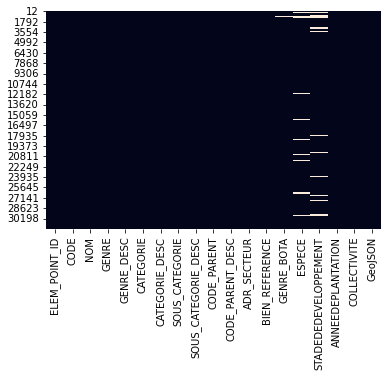

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
df = pd.read_csv('../data/original/ESP_PUBLIC.IDENTITE_ARBRE.csv')
df.info()
sns.heatmap(df.isnull(), cbar=False)
df.dropna(subset=['ANNEEDEPLANTATION'], inplace=True)
df.drop(columns=df.columns[[15, 17, 18] + list(range(20, 30))], inplace=True)
sns.heatmap(df.isnull(), cbar=False)
df.nunique()